In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weather=pd.read_csv('../../data/weather.csv')
print(weather)

         id  year  month element    d1    d2    d3    d4    d5    d6  ...  \
0   MX17004  2010      1    tmax   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1   MX17004  2010      1    tmin   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2   MX17004  2010      2    tmax   NaN  27.3  24.1   NaN   NaN   NaN  ...   
3   MX17004  2010      2    tmin   NaN  14.4  14.4   NaN   NaN   NaN  ...   
4   MX17004  2010      3    tmax   NaN   NaN   NaN   NaN  32.1   NaN  ...   
5   MX17004  2010      3    tmin   NaN   NaN   NaN   NaN  14.2   NaN  ...   
6   MX17004  2010      4    tmax   NaN   NaN   NaN   NaN   NaN   NaN  ...   
7   MX17004  2010      4    tmin   NaN   NaN   NaN   NaN   NaN   NaN  ...   
8   MX17004  2010      5    tmax   NaN   NaN   NaN   NaN   NaN   NaN  ...   
9   MX17004  2010      5    tmin   NaN   NaN   NaN   NaN   NaN   NaN  ...   
10  MX17004  2010      6    tmax   NaN   NaN   NaN   NaN   NaN   NaN  ...   
11  MX17004  2010      6    tmin   NaN   NaN   NaN   NaN   NaN   NaN  ...   

In [3]:
# melt weather for better look at the data
weather_melted = weather.melt(
    id_vars=['id','year','month','element'],
    var_name='day',
    value_name='temp'
)

print(weather_melted)

          id  year  month element  day  temp
0    MX17004  2010      1    tmax   d1   NaN
1    MX17004  2010      1    tmin   d1   NaN
2    MX17004  2010      2    tmax   d1   NaN
3    MX17004  2010      2    tmin   d1   NaN
4    MX17004  2010      3    tmax   d1   NaN
..       ...   ...    ...     ...  ...   ...
677  MX17004  2010     10    tmin  d31   NaN
678  MX17004  2010     11    tmax  d31   NaN
679  MX17004  2010     11    tmin  d31   NaN
680  MX17004  2010     12    tmax  d31   NaN
681  MX17004  2010     12    tmin  d31   NaN

[682 rows x 6 columns]


c:\Users\Admin\Documents\testlab\pandas4E\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Documents\testlab\pandas4E\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Documents\testlab\pandas4E\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Documents\testlab\pandas4E\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

<Axes: xlabel='month', ylabel='temp'>

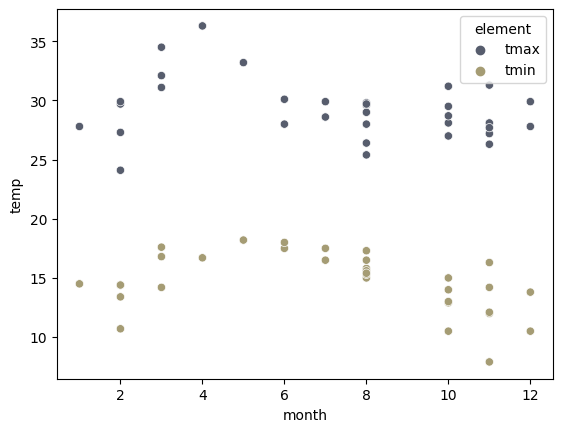

In [19]:
temp_plot, ax = plt.subplots()
sns.scatterplot(
    data=weather_melted,
    x='month',
    y='temp',
    hue='element',
    palette='cividis',
    ax=ax
)


The above plot shows each measurement taken by month, there are fluctuation which we cant identify clearly, let us clean the data further

In [26]:
weather_tidy = (
    weather_melted
    .pivot_table(
        index=['id','year','month','day'],
        values='temp',
        columns='element'
    )
    .reset_index()
)
print(weather_tidy)

element       id  year  month  day  tmax  tmin
0        MX17004  2010      1  d30  27.8  14.5
1        MX17004  2010      2  d11  29.7  13.4
2        MX17004  2010      2   d2  27.3  14.4
3        MX17004  2010      2  d23  29.9  10.7
4        MX17004  2010      2   d3  24.1  14.4
5        MX17004  2010      3  d10  34.5  16.8
6        MX17004  2010      3  d16  31.1  17.6
7        MX17004  2010      3   d5  32.1  14.2
8        MX17004  2010      4  d27  36.3  16.7
9        MX17004  2010      5  d27  33.2  18.2
10       MX17004  2010      6  d17  28.0  17.5
11       MX17004  2010      6  d29  30.1  18.0
12       MX17004  2010      7   d3  28.6  17.5
13       MX17004  2010      7  d14  29.9  16.5
14       MX17004  2010      8  d23  26.4  15.0
15       MX17004  2010      8   d5  29.6  15.8
16       MX17004  2010      8  d29  28.0  15.3
17       MX17004  2010      8  d13  29.8  16.5
18       MX17004  2010      8  d25  29.7  15.6
19       MX17004  2010      8  d31  25.4  15.4
20       MX17

let us look at violin plot of our data:

c:\Users\Admin\Documents\testlab\pandas4E\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Documents\testlab\pandas4E\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Documents\testlab\pandas4E\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Documents\testlab\pandas4E\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

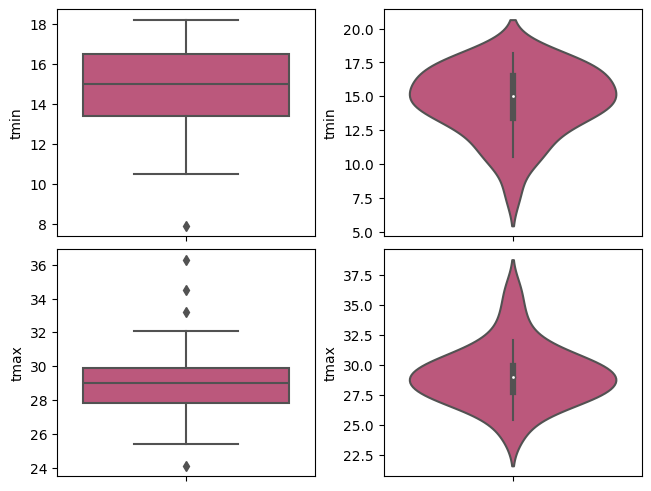

In [40]:
temp_violin, axs = plt.subplots(nrows=2,ncols=2)

sns.boxplot(data=weather_tidy,y='tmin',palette='plasma',ax=axs[0,0])
sns.violinplot(data=weather_tidy,y='tmin',palette='plasma',ax=axs[0,1])
sns.boxplot(data=weather_tidy,y='tmax',palette='plasma',ax=axs[1,0],)
sns.violinplot(data=weather_tidy,y='tmax',palette='plasma',ax=axs[1,1])

temp_violin.set_constrained_layout(True)

In [41]:
weather_tidy.tmin.describe()

count    33.000000
mean     14.651515
std       2.473752
min       7.900000
25%      13.400000
50%      15.000000
75%      16.500000
max      18.200000
Name: tmin, dtype: float64

In [42]:
weather_tidy.tmax.describe()

count    33.000000
mean     29.190909
std       2.497419
min      24.100000
25%      27.800000
50%      29.000000
75%      29.900000
max      36.300000
Name: tmax, dtype: float64

From those 2 graphs, We can make a conclusion as follow:
1. The warmest month range is from Apr-May
2. The median and also the average min temperature is 14.5~15degree
3. The median and also the average max temperature is 29degree
4. From May till Octorber, the minimum temperature and the maximum temperature is around the median range, respectively.
5. The coldest months is from November till early March